## Classification (분류)
[분류문제](https://en.wikipedia.org/wiki/Statistical_classification)

* binary Classification : 분류가 2가지인 경우 (e.g. True or False) 
* multi-class Classification : 분류가 3가지 이상(e.g. 사람, 음식, 개 등등)인 경우
* multi-label Classification : 다중으로 분류가 될 수 있는 것, (e.g. 신문기사에서 정치와 경제 모두 포함될 수 있는 기사. (하나의 분류가 여러개를 가질 수 있음))

In [1]:
# 앞으로 우리가 할 일
# 1. 분류 모델의 아키텍처를 확인
# 2. 입력과 출력의 형태를 생성
#     - 'X' : feature / 데이터 (입력)
#     - 'Y' : 레이블 (Lable) (출력)
#       어디에 속하는지
# 3. 모델링 단계
#      1) 모델 생성
#      2) 모델 컴파일
#          - 손실 함수 설정
#          - 최적화 함수 설정
#          - 평가 지표 생성
#      3) 모델 피팅 (데이터에서 패턴 찾기)
# 4. 모델 평가
#      1) 모델 시각화
#      2) 학습 곡선 확인
#      3) 예측 결과를 실제 데이터와 비교 (평가 지표 사용)
# 5. 모델 저장 (나중의 사용을 위해서)
# 6. 모델 가져와서 사용하기

* Input Layer shape (입력층의 형태) : 특성 (feature, column, variable)의 갯수 (shape)
* Hidden Layer (은닉층) : 해결하려는 문제에 따라 최소 1개 이상으로 이루어진다.
* 은닉층 각각을 구성하는 뉴런 : 해결하려는 문제에 따라 최소 10 ~ 최대 100로 이루어진다.
* Output Leayer shape (출력층의 형태) : Binary Classification (1) / Multiclass Classification (클래스당 1)(사람,음식인경우 2개) 
* 은닉층의 활성화 함수 : [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit)
* 출력층의 활성화 함수 : Binary Classification : sigmoid / Multiclass Classification : softmax
* 손실함수 : Binary Classification : tf.keras.losses.BinaryCrossentropy / Multiclass Classification : tf.keras.losses.CategoricalCrossentropy
* 옵티마이저 (최적화) : SGD (stochastic gradient descent), Adam


In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


In [3]:
!pip install scikit-learn

You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
import sklearn as sk

In [6]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples, noise=0.03, random_state=42)
X, y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [7]:
y[:10]


array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [11]:
circles = pd.DataFrame({
    "X0": X[:,0],
    "X1": X[:,1],
    "label": y
})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [12]:
circles.label.value_counts()


0    500
1    500
Name: label, dtype: int64

* 지금까지 라벨값을 살펴보니 0,1 만 존재 -> binary classification
* e.g. (0, 1, 2, 3) -> multiclass classification

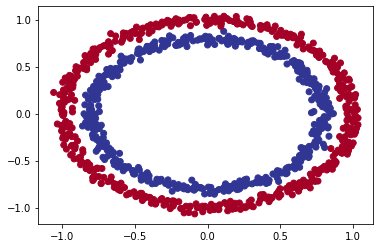

In [16]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [19]:
X.shape, y.shape, len(X), len(y)

((1000, 2), (1000,), 1000, 1000)

In [27]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [36]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
model.compile(
    loss= tf.keras.losses.BinaryCrossentropy(),
    optimizer= tf.keras.optimizers.SGD(),
    metrics= ['accuracy']
)

model.fit(X, y, epochs=200)

0.4600
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6942 - accuracy: 0.4820
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4990
Epoch 7/200
32/32 [==============================] - 0s 6ms/step - loss: 0.6943 - accuracy: 0.4880
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4950
Epoch 9/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.4840
Epoch 10/200
32/32 [==============================] - 0s 6ms/step - loss: 0.6938 - accuracy: 0.4820
Epoch 11/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.4640
E

In [37]:
model.fit(X, y, epochs=200, verbose=0)

In [38]:
model.evaluate(X, y)

32/32 [==============================] - 0s 931us/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

## 모델 개선시키기
현재까지 생성한 모델을 기반으로 개선을 시킨다라는 개념

1. **모델 정의 부분** : 레이어를 추가하거나, 레이어를 이루는 neuron 단위를 추가, 활성 함수를 변경
2. **모델 컴파일** : optimizer를 변경, 최적화 함수를 수행하는 learning rate를 변경
3. **모델 피팅** : epoch를 늘러주거나, 데이터 더 많이 준다

In [40]:
# model_2
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)

])
model.compile(
    loss= tf.keras.losses.BinaryCrossentropy(),
    optimizer= tf.keras.optimizers.SGD(),
    metrics= ['accuracy']
)

model.fit(X, y, epochs=200)

0.4800
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6972 - accuracy: 0.5010
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 0.7019 - accuracy: 0.4750
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6979 - accuracy: 0.4940
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6964 - accuracy: 0.5030
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6963 - accuracy: 0.5240
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6992 - accuracy: 0.4930
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6970 - accuracy: 0.5160
Epoch 9/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6991 - accuracy: 0.4840
Epoch 10/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6964 - accuracy: 0.4680
Epoch 11/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6992 - accuracy: 0.4870
E

In [41]:
model.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6957 - accuracy: 0.5000


[0.6957396864891052, 0.5]

In [50]:
# model_2
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)

])
model.compile(
    loss= tf.keras.losses.BinaryCrossentropy(),
    optimizer= tf.keras.optimizers.Adam(),
    metrics= ['accuracy']
)

model.fit(X, y, epochs=200)

0.4490
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 0.7229 - accuracy: 0.4390
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6971 - accuracy: 0.4700
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6953 - accuracy: 0.4620
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.4750
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4750
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.5040
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.4980
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.4880
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.4480
Epoch 11/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6952 - accuracy: 0.4450
E

In [51]:
model.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6932550668716431, 0.5]

In [52]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    x_in = np.c_[xx.ravel(), yy.ravel()]

    y_predict = model.predict(x_in)

    if len(y_predict[0]) > 1:
        print("Multiclass classification")
        y_predict = np.argmax(y_predict, axis=1).reshape(xx.shape)
    else:
        print("Binary Classification")
        y_predict = np.round(y_predict).reshape(xx.shape)

    plt.contourf(xx, yy, y_predict, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())


Binary Classification


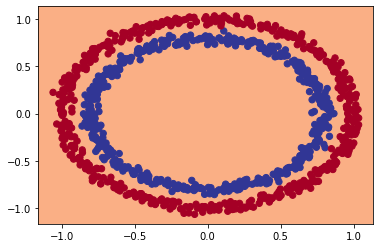

In [53]:
plot_decision_boundary(model, X, y)

In [57]:
# model_2
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)

])
model.compile(
    loss= tf.keras.losses.mae,
    optimizer= tf.keras.optimizers.Adam(),
    metrics= ['mae']
)


In [58]:
tf.random.set_seed(42)

X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

X_reg_train = X_regression[: 150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[: 150]
y_reg_test = y_regression[150:]

model.fit(X, y, epochs=200)


Epoch 1/200
32/32 [==============================] - 0s 1ms/step - loss: 0.5278 - mae: 0.5278
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 0.5035 - mae: 0.5035
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 0.5022 - mae: 0.5022
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 0.5042 - mae: 0.5042
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 0.5021 - mae: 0.5021
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 0.5034 - mae: 0.5034
Epoch 7/200
32/32 [==============================] - 0s 3ms/step - loss: 0.5016 - mae: 0.5016
Epoch 8/200
32/32 [==============================] - 0s 5ms/step - loss: 0.5051 - mae: 0.5051
Epoch 9/200
32/32 [==============================] - 0s 3ms/step - loss: 0.5018 - mae: 0.5018
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 0.5029 - mae: 0.5029
Epoch 11/200
32/32 [==============================] - 0s 3m

In [59]:
y_reg_predict = model.predict(y_reg_test)

plt.figure(figsize= (10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Trsting data")
plt.scatter(X_reg_test, y_reg_predict.squeeze(), c="r", label="predict")


ValueError: in user code:

    /Users/sangjulee1/Documents/cv_week05_2/week05_2venv/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1569 predict_function  *
        return step_function(self, iterator)
    /Users/sangjulee1/Documents/cv_week05_2/week05_2venv/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1559 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/sangjulee1/Documents/cv_week05_2/week05_2venv/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/sangjulee1/Documents/cv_week05_2/week05_2venv/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/sangjulee1/Documents/cv_week05_2/week05_2venv/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/sangjulee1/Documents/cv_week05_2/week05_2venv/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1552 run_step  **
        outputs = model.predict_step(data)
    /Users/sangjulee1/Documents/cv_week05_2/week05_2venv/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1525 predict_step
        return self(x, training=False)
    /Users/sangjulee1/Documents/cv_week05_2/week05_2venv/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:1013 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /Users/sangjulee1/Documents/cv_week05_2/week05_2venv/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:251 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_11 is incompatible with the layer: expected axis -1 of input shape to have value 2 but received input with shape (None, 1)


* 지금까지의 모델은 선형으로 처리를했기 때문에 분류를 잘 하지 못했다.
* Non-linearity = Non-straight (비선형)으로 데이터를 보는 시각이 필요하다.

In [60]:
# model_2
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear),
    tf.keras.layers.Dense(1)
])
model.compile(
    loss= tf.keras.losses.BinaryCrossentropy(),
    optimizer= tf.keras.optimizers.Adam(lr=0.001),
    metrics= ['accuracy']
)

model.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 4.2380 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0223 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 3.8296 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 3.7654 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 3.6464 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 3.4960 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 3.3803 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.2273 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 2.8035 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 5ms/step - loss: 2.5701 - accuracy: 0.5000
Epoch 11/

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.R)

In [61]:
# model_2
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])
model.compile(
    loss= tf.keras.losses.BinaryCrossentropy(),
    optimizer= tf.keras.optimizers.Adam(lr=0.001),
    metrics= ['accuracy']
)

model.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 1.8377 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 1.4449 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 1.3410 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 1.2678 - accuracy: 0.4770
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 1.2116 - accuracy: 0.4390
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 1.1664 - accuracy: 0.4180
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1294 - accuracy: 0.4250
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0970 - accuracy: 0.4420
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0670 - accuracy: 0.4540
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 1.0407 - accuracy: 0.4550
Epoch 11/

In [62]:
# model_2
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])
model.compile(
    loss= tf.keras.losses.BinaryCrossentropy(),
    optimizer= tf.keras.optimizers.Adam(lr=0.001),
    metrics= ['accuracy']
)

model.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

Binary Classification


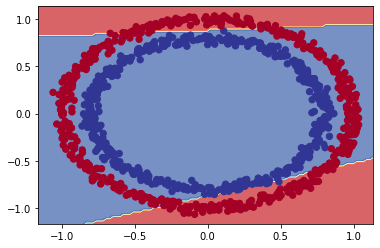

In [63]:
plot_decision_boundary(model, X, y)

In [77]:
# model_2
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid),
])
model.compile(
    loss= tf.keras.losses.BinaryCrossentropy(),
    optimizer= tf.keras.optimizers.Adam(lr=0.001),
    metrics= ['accuracy']
)

model.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.5390
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6794 - accuracy: 0.5380
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6785 - accuracy: 0.5500
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6778 - accuracy: 0.5480
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6772 - accuracy: 0.5530
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6766 - accuracy: 0.5510
Epoch 11/

In [66]:
model.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.2948 - accuracy: 0.9910


[0.2948004901409149, 0.9909999966621399]

Binary Classification


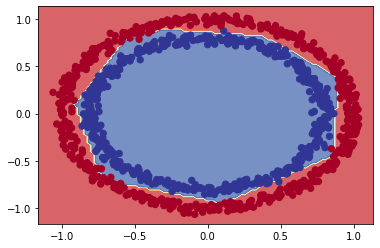

In [67]:
plot_decision_boundary(model, X, y)

In [68]:
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

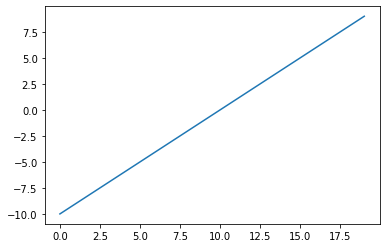

In [69]:
plt.plot(A)

In [70]:
def sigmoid(x):
    return 1/(1+tf.exp(-x))

sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

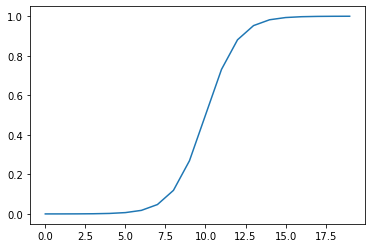

In [72]:
plt.plot(sigmoid(A)) # 선형이 비선형이 된다.

In [74]:
def relu(x):
    return tf.maximum(0, x)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

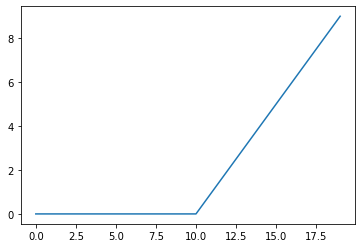

In [75]:
plt.plot(relu(A))

In [76]:
len(X)

1000

In [78]:
X_train , y_train = X[:800], y[:800]
X_test , y_test = X[800:], y[800:]



In [79]:
# model_2
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid),
])
model.compile(
    loss= tf.keras.losses.BinaryCrossentropy(),
    optimizer= tf.keras.optimizers.Adam(lr=0.01),
    metrics= ['accuracy']
)

model.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 0.6834 - accuracy: 0.5550
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6761 - accuracy: 0.5630
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6700 - accuracy: 0.5600
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6615 - accuracy: 0.5960
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6553 - accuracy: 0.5850
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6386 - accuracy: 0.6360
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6150 - accuracy: 0.6890
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5641 - accuracy: 0.7480
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5101 - accuracy: 0.8090
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4451 - accuracy: 0.8550
Epoch 11/

In [80]:
loss, accuracy = model.evaluate(X_test, y_test)


7/7 [==============================] - 0s 3ms/step - loss: 0.0302 - accuracy: 0.9850


Binary Classification
Binary Classification


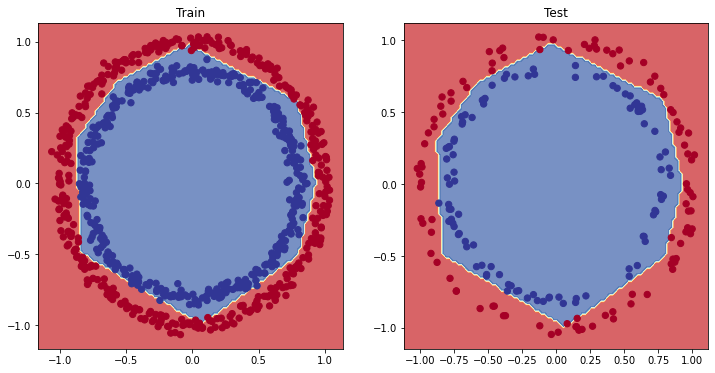

In [81]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model, X=X_train, y=y_train)
plt.subplot(1,2,2,)
plt.title("Test")
plot_decision_boundary(model, X=X_test, y=y_test)
plt.show()

NameError: name 'history' is not defined